第八章 降维

一、降维方法

（一）投影

（二）流形学习

二、降维算法

（一）主成分分析（PCA：Principal Component Analysis）——依赖投影

1、增量PCA（Incremental PCA）

分批在训练集上作奇异值分解

2、Randomized PCA

(二)Kernel PCA(KPCA)——依赖投影

(三)LLA(Locally Linear Embedding)——依赖流形学习

(四)其他算法

1、MDS(Multidimensional Scaling)

算法核心：试图在低维空间中保持原始数据点之间的距离，以此来反映高维空间中的距离或相似性。

2、Isomap

算法核心：在数据的高维空间中保持局部距离，通过一种特殊的方法将数据映射到低维空间中，同时尽可能保持数据点之间的地理邻近性。

3、t-Distributed Stochastic Neighbor Embedding (t-SNE)

算法核心：基于概率分布之间的相似性，它试图在低维空间中保持高维空间中的局部结构。





In [1]:
import numpy as np
import os
%matplotlib inline
os.environ["OMP_NUM_THREADS"]="7"
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_swiss_roll

In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784")

In [16]:
X=np.array([[2,3,5],[3,5,9],[7,9,10]])
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
print(c1)
#U:正交矩阵，其列是左奇异向量
#s：奇异值，一个按降序排列的数组
#Vt：正交矩阵，其行是右奇异向量
#保证数据的每个特征都具有均值0，即中心化数据
W2=Vt.T[:,:2]
X2D=X_centered.dot(W2)



[0.55143998 0.65308558 0.519031  ]


In [15]:
#使用Scikit-Leran进行主成分分析
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
print(pca.components_.T[:,0])

[0.55143998 0.65308558 0.519031  ]


In [17]:
#解释变量比例
pca.explained_variance_ratio_
#第一个新的变量就涵盖了90%以上的原信息

array([0.92791617, 0.07208383])

In [20]:
#选择降维后的维度
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
pca1=PCA(n_components=d)
X_reduced1=pca.fit_transform(X)
pca2=PCA(n_components=0.95)
X_reduced2=pca.fit_transform(X)
print(X_reduced1)
print(X_reduced2)


[[-4.40153449e+00 -8.58839451e-01  2.87999712e-16]
 [-4.67799366e-01  1.49184724e+00  2.87999712e-16]
 [ 4.86933386e+00 -6.33007792e-01  2.87999712e-16]]
[[-4.40153449e+00 -8.58839451e-01  2.87999712e-16]
 [-4.67799366e-01  1.49184724e+00  2.87999712e-16]
 [ 4.86933386e+00 -6.33007792e-01  2.87999712e-16]]


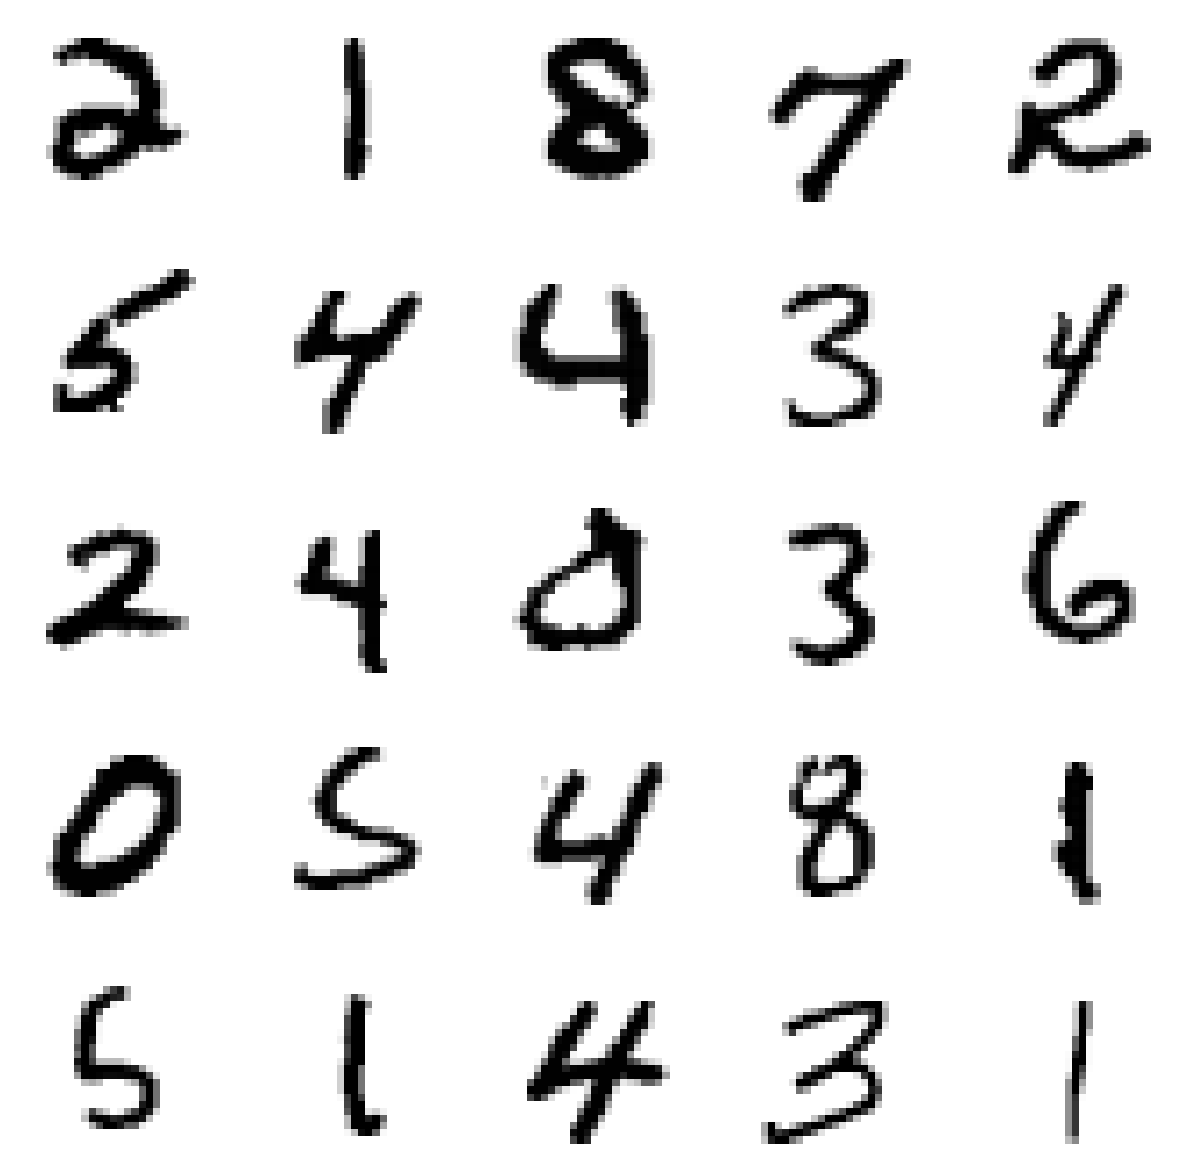

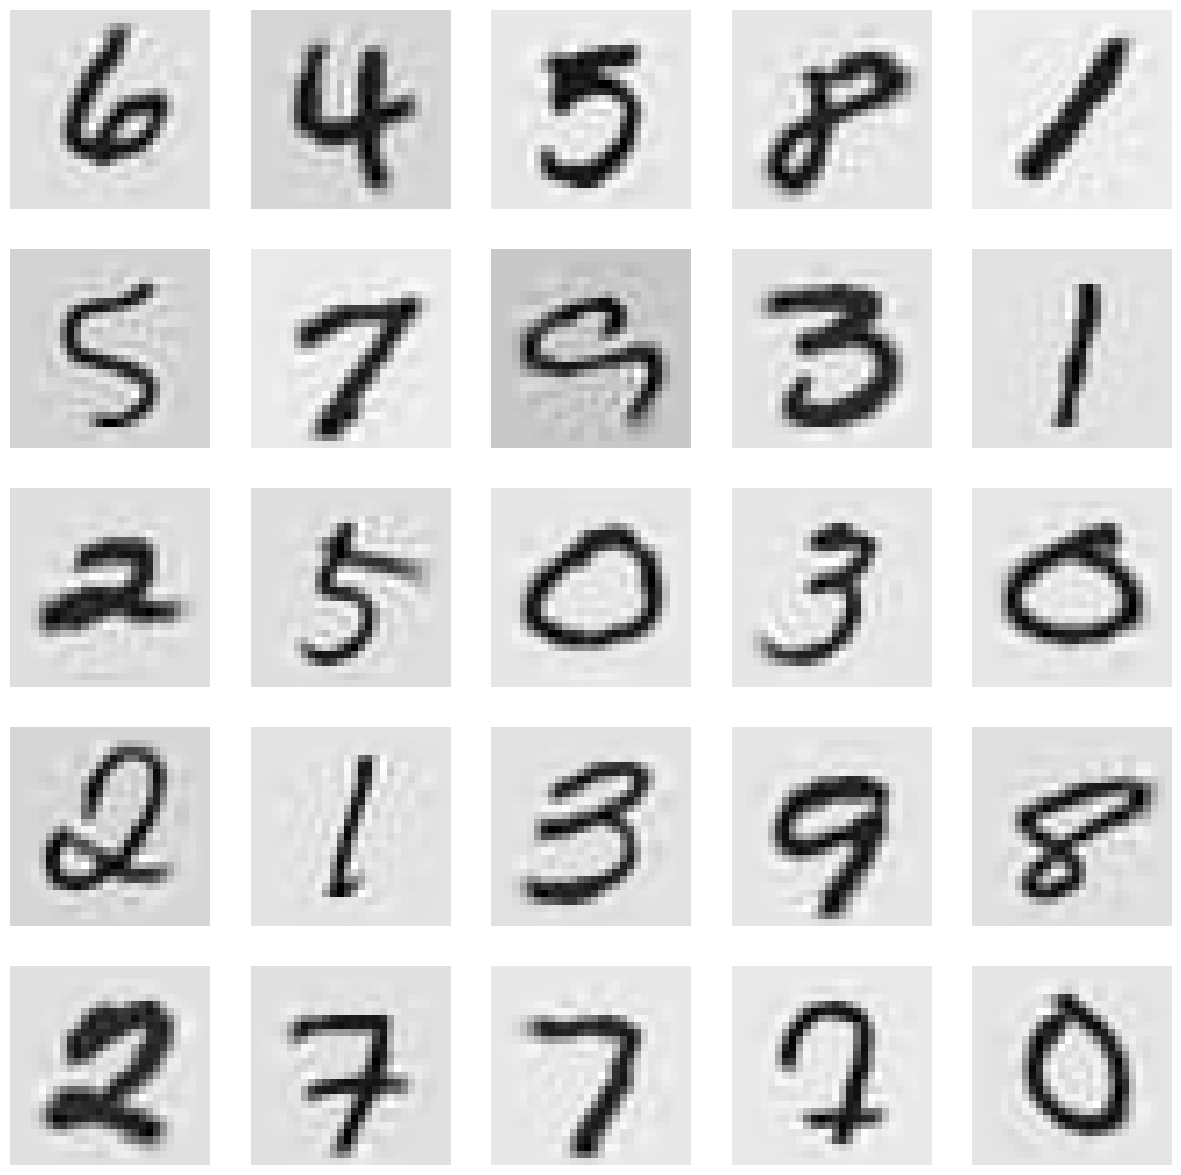

In [17]:
X=np.array(mnist["data"])
y=np.array(mnist["target"])
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
pca=PCA(n_components=169)
X_reduced=pca.fit_transform(X_train)
X_recovered=pca.inverse_transform(X_reduced)
#可视化
plt.figure(figsize=(15,15))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)  # 5行5列的子图
    some_digit = np.array(X)[np.random.randint(60000)]
    some_digit_image=some_digit.reshape(28,28)
    ax.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest") 
    ax.axis("off")
plt.show()

plt.figure(figsize=(15,15))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)  # 5行5列的子图
    some_digit = np.array(X_recovered)[np.random.randint(60000)]
    some_digit_image=some_digit.reshape(28,28)
    ax.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest") 
    ax.axis("off")
plt.show()

In [18]:
#IPCA
from sklearn.decomposition import IncrementalPCA
n_batches=100
inc_pca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,100):
    inc_pca.partial_fit(X_batch)
X_reduced=inc_pca.transform(X_train)


In [19]:
#Randomized PCA
rnd_pca=PCA(n_components=154,svd_solver="randomized")
X_reduced=rnd_pca.fit_transform(X_train)

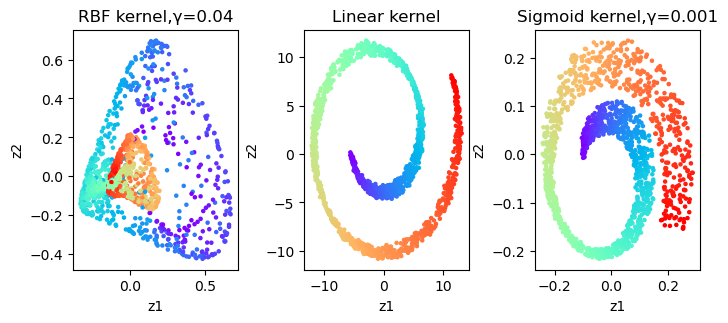

In [15]:
#KernelPCA
X,t=make_swiss_roll(n_samples=1500,noise=0.1,random_state=None)
from sklearn.decomposition import KernelPCA
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
X_reduced1=rbf_pca.fit_transform(X)
lin_pca=KernelPCA(n_components=2,kernel="linear")
X_reduced2=lin_pca.fit_transform(X)
sig_pca=KernelPCA(n_components=2,kernel="sigmoid",gamma=0.001)
X_reduced3=sig_pca.fit_transform(X)

plt.subplots_adjust(left=0.01, right=0.99, bottom=0.25, top=0.75, wspace=0.4,hspace=0.6)
ax1=plt.subplot(1,3,1)
ax1.scatter(X_reduced1[:,0],X_reduced1[:,1],c=t,cmap="rainbow",s=5)
ax1.set_title("RBF kernel,γ=0.04")
ax1.set_xlabel("z1")
ax1.set_ylabel("z2")

ax2=plt.subplot(1,3,2)
ax2.scatter(X_reduced2[:,0],X_reduced2[:,1],c=t,cmap="rainbow",s=5)
ax2.set_title("rbf")
ax2.set_title("Linear kernel")
ax2.set_xlabel("z1")
ax2.set_ylabel("z2")

ax3=plt.subplot(1,3,3)
ax3.scatter(X_reduced3[:,0],X_reduced3[:,1],c=t,cmap="rainbow",s=5)
ax3.set_title("Sigmoid kernel,γ=0.001")
ax3.set_xlabel("z1")
ax3.set_ylabel("z2")

plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

clf=Pipeline([("kpca",KernelPCA(n_components=2)),("log_reg",LogisticRegression())])
param_grid=[{"kpca__gamma":np.linspace(0.03,0.05,10),"kpca__kernel":["rbf","sigmoid"]}]
grid_search=GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [28]:
#另一种格点搜索的方法（最小化降维还原后的数据点和原数据点的均方差）
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.03,fit_inverse_transform=True)
X_reduced=rbf_pca.fit_transform(X)
X_preimage=rbf_pca.inverse_transform(X_reduced)
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

0.24700551972328155

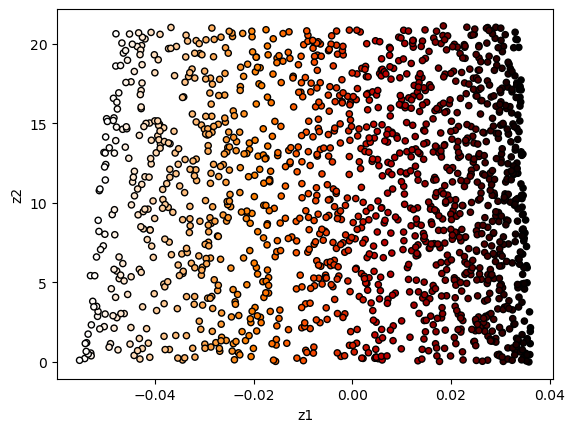

In [41]:
#LLA
from sklearn.manifold import LocallyLinearEmbedding
X,t=make_swiss_roll(n_samples=1500,noise=0.1,random_state=None)
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X)
plt.scatter(X_reduced[:,0],X[:,1],c=t,edgecolors="black",cmap="gist_heat",s=20)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Text(0, 0.5, 'z2')

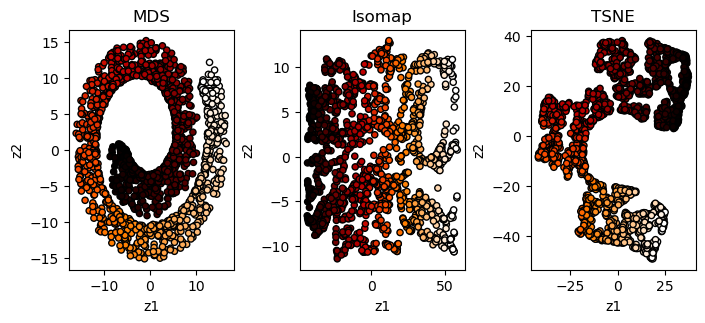

In [42]:
#其他流形学习
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
mds=MDS(n_components=2)
isomap=Isomap(n_components=2)
tsne=TSNE(n_components=2)
X_reduced1=mds.fit_transform(X)
X_reduced2=isomap.fit_transform(X)
X_reduced3=tsne.fit_transform(X)

#可视化
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.25, top=0.75, wspace=0.4,hspace=0.6)
ax1=plt.subplot(1,3,1)
ax1.scatter(X_reduced1[:,0],X_reduced1[:,1],c=t,edgecolors="black",cmap="gist_heat",s=20)
ax1.set_title("MDS")
ax1.set_xlabel("z1")
ax1.set_ylabel("z2")

ax2=plt.subplot(1,3,2)
ax2.scatter(X_reduced2[:,0],X_reduced2[:,1],c=t,edgecolors="black",cmap="gist_heat",s=20)
ax2.set_title("Isomap")
ax2.set_xlabel("z1")
ax2.set_ylabel("z2")

ax3=plt.subplot(1,3,3)
ax3.scatter(X_reduced3[:,0],X_reduced3[:,1],c=t,edgecolors="black",cmap="gist_heat",s=20)
ax3.set_title("TSNE")
ax3.set_xlabel("z1")
ax3.set_ylabel("z2")